In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')
print(df[:5][:])

          X           y
0  1.541629  730.044365
1  0.473741  227.831985
2  0.761247  217.335793
3  0.411976  393.739808
4  0.260636 -212.825472


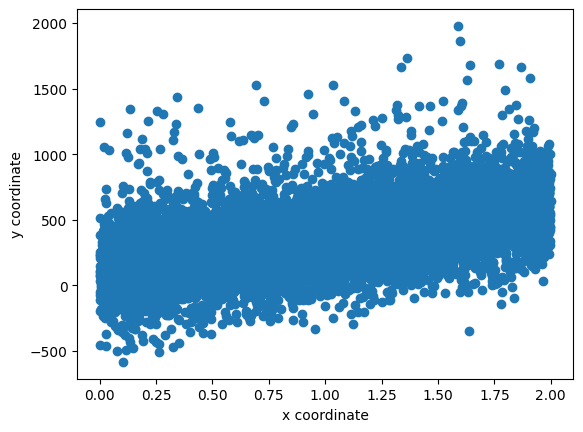

In [5]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()

In [12]:
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])
mean_x, mean_y = np.mean(x),np.mean(y)
std_x, std_y = np.std(x), np.std(y)
z_x = (x - mean_x) / std_x
z_y = (y - mean_y) / std_y
threshold=3
filtered_data = pd.DataFrame(columns=['X', 'y'])
for i in range (8000):
    if ((np.abs(z_x[i]) <= threshold) and (np.abs(z_y[i]) <= threshold)):
        filtered_data.loc[len(filtered_data)] = {'X':x[i],'y':y[i]}
print(filtered_data[:5][:])

          X           y
0  1.541629  730.044365
1  0.473741  227.831985
2  0.761247  217.335793
3  0.411976  393.739808
4  0.260636 -212.825472


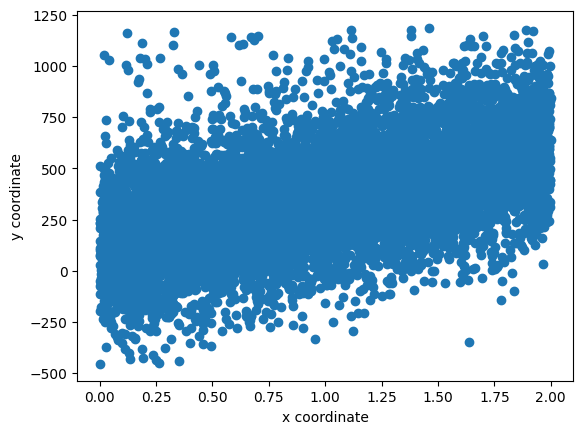

In [14]:
plt.scatter(filtered_data.iloc[:,0],filtered_data.iloc[:,1])
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()

In [15]:
filtered_data.to_csv('filtered_data.csv')

In [21]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv("filtered_data.csv")
X = np.array(df.iloc[:,1])
y = np.array(df.iloc[:,2])
X = np.c_[np.ones(X.shape[0]), X]
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.27374623170092516

In [22]:
reg.coef_

array([  0.        , 238.23507716])

In [23]:
reg.intercept_

128.4806190240386